In [90]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.image as img
from statistics import mean
from itertools import product

In [91]:
img = cv2.imread('2.jpg')

print('Общее количество значений: '+str(img.size)) #общее кол-во пикселей в изображении
print('Размер матрицы: '+str(img.shape))

#самым важным для нас является то, что у нас всего 3 спектра в данном изображении (RGB - red, blue, green)

Общее количество значений: 607500
Размер матрицы: (450, 450, 3)


Принцип работы билитерального фильтра в нашей лабораторной работе достаточно прост.

Что мы имеем? 
Мы имеем фильтр реалезующий всё самое лучше от гауссовского и медианного фильтров. 

Что же на деле?

Идём внизу читать.

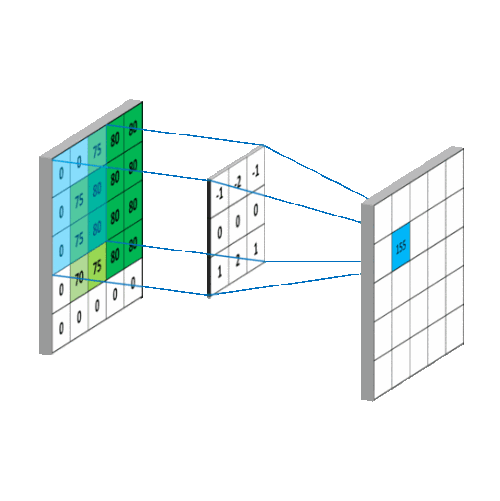

In [112]:
import IPython

from IPython.display import Image
Image('gif.gif', format='png')

In [92]:
blue_ch, green_ch, red_ch = cv2.split(img) #разбиваем изображение по спектрам

In [93]:
def make_zeros(number): #создаём массив, в который в будущем будем записывать каждый из спекторов
    return [0] * number

In [94]:
bilet_blue = [] #собственно создаём отдельный массив (пока что пустой) для одного спектра
count = 0
for row in blue_ch:
    bilet_blue.append(make_zeros(len(blue_ch[0])))

In [95]:
B = 127

In [96]:
#если посмотреть сейчас на гифку её раз, можно заметить, что мы взяли именно данную концепцию движения по массиву

for n in range (len(blue_ch)):
    for c in range (len(blue_ch[0])):#создаём цикл, в котором pn, pc, mn, mc являются соседними пикселями
        pn = n+1
        pc = c+1
        mn = n-1
        mc = c-1
        
        if pn == len(blue_ch): #прописываем те пиксели, что являются крайними на изображении
            pn = n
        if pc == len(blue_ch[0]): #по сути для того, чтобы края не трогались фильтром
            pc = c
            
        all_n = [n, pn, mn]
        all_c = [c, pc, mc]
        all_combo = list(product(all_n, all_c)) 
        pixels = [] 
        for xy in all_combo:
            if abs(blue_ch[n][c]-blue_ch[xy[0]][xy[1]]) < B:
                pixels.append(blue_ch[xy[0]][xy[1]])
        
        px = mean(pixels) #берём среднее по всем пикселям, что удовлетворили условие
        bilet_blue[n][c] = px

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in ubyte_scalars


In [97]:
bilet_red = [] #то же самое для 2-го спектра
count = 0
for row in red_ch:
    bilet_red.append(make_zeros(len(red_ch[0])))

In [98]:
for n in range (len(red_ch)):
    for c in range (len(red_ch[0])):
        pn = n+1
        pc = c+1
        mn = n-1
        mc = c-1
        
        if pn == len(red_ch):
            pn = n
        if pc == len(red_ch[0]):
            pc = c
            
        all_n = [n, pn, mn]
        all_c = [c, pc, mc]
        all_combo = list(product(all_n, all_c)) 
        pixels = []
        for xy in all_combo:
            if abs(red_ch[n][c]-red_ch[xy[0]][xy[1]]) < B:
                pixels.append(red_ch[xy[0]][xy[1]])
        
        px = mean(pixels)
        bilet_red[n][c] = px

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in ubyte_scalars


In [99]:
bilet_green = []
count = 0
for row in green_ch:
    bilet_green.append(make_zeros(len(green_ch[0])))

In [100]:
for n in range (len(green_ch)):
    for c in range (len(green_ch[0])):
        pn = n+1
        pc = c+1
        mn = n-1
        mc = c-1
        
        if pn == len(green_ch): 
            pn = 0
        if pc == len(green_ch[0]): 
            pc = 0
        
        all_n = [n, pn, mn]
        all_c = [c, pc, mc]
        all_combo = list(product(all_n, all_c))
            
        pixels = []
        for xy in all_combo:
            if abs(green_ch[n][c]-green_ch[xy[0]][xy[1]]) < B:
                pixels.append(green_ch[xy[0]][xy[1]])
                
        px = mean(pixels)
        bilet_green[n][c] = px

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in ubyte_scalars


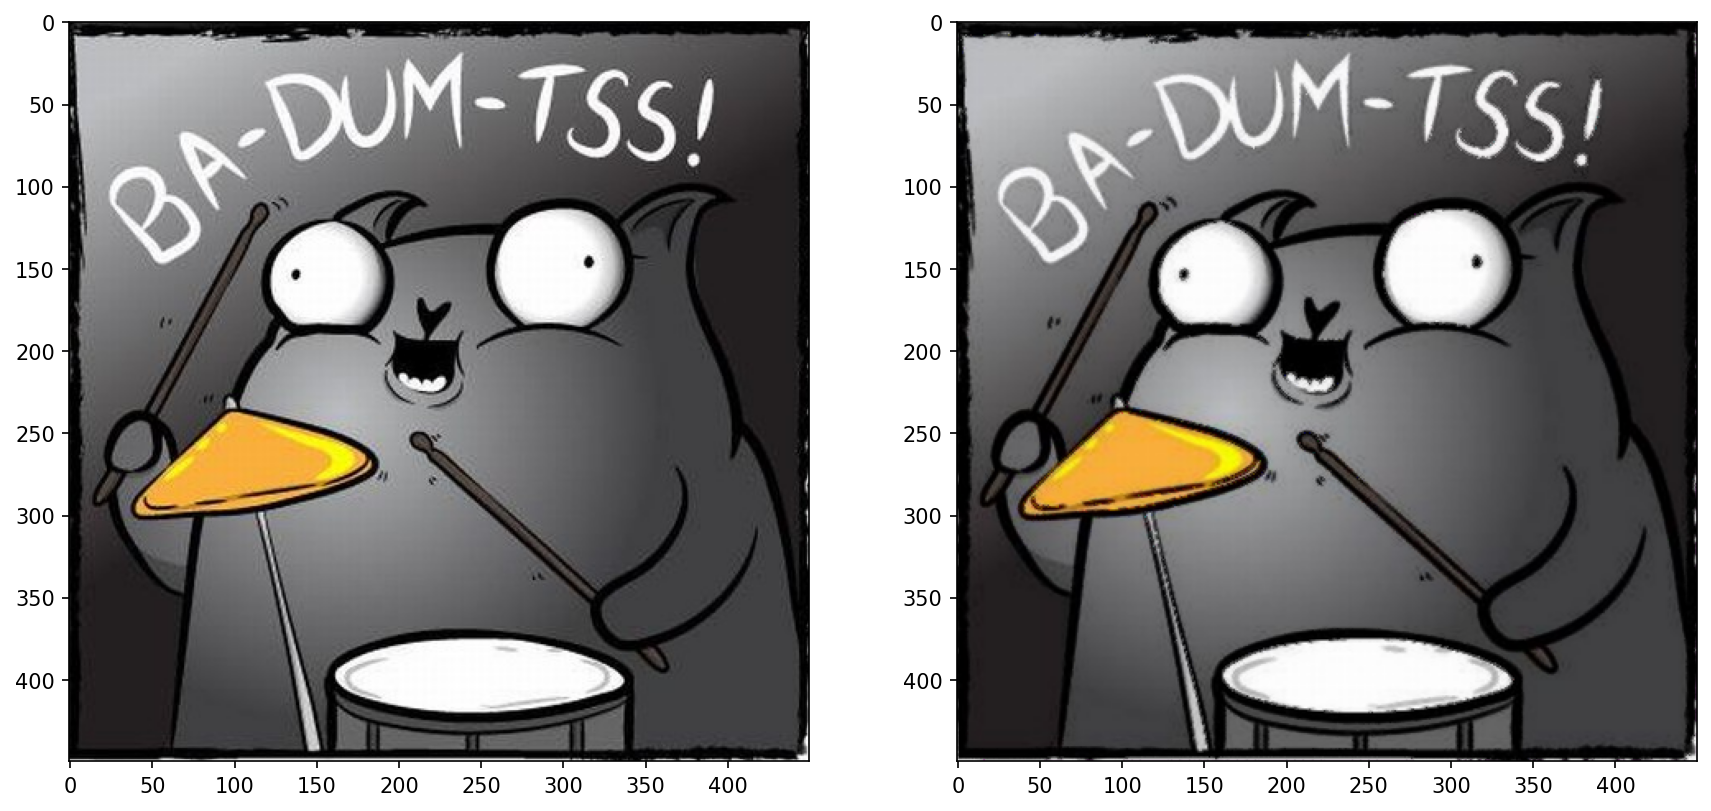

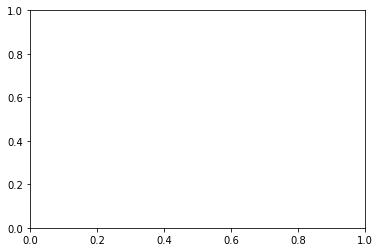

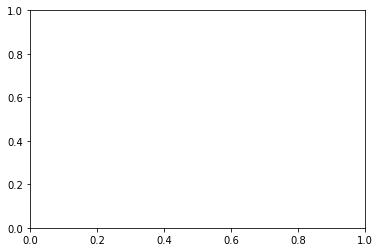

In [101]:
from numpy import dstack
import skimage
import matplotlib.pyplot as plt
fig,(ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 8), dpi=150)

img_f=dstack((red_ch,green_ch, blue_ch))
fig, ax = plt.subplots(1, 1)
ax1.imshow(img_f)

img_f=dstack((bilet_red, bilet_green, bilet_blue))
fig, ax = plt.subplots(1, 1)
ax2.imshow(img_f)